# L4: Prompt format

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Load API Keys

In [15]:
import os
from utils import get_llama_api_key, get_hf_access_token

llama_api_key = get_llama_api_key()
#hf_access_token = get_hf_access_token()
hf_access_token = os.getenv("HF_ACCESS_TOKEN")

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.</p>

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

## Using Hugging Face transformers

### llama33 doesn't work, comment it out !!!

In [23]:
from huggingface_hub import login

login(token=hf_access_token)

In [25]:
from transformers import AutoProcessor

processor_llama4 = AutoProcessor.from_pretrained("meta-llama/Llama-4-Scout-17B-16E-Instruct", token=hf_access_token)
#processor_llama33 = AutoProcessor.from_pretrained("meta-llama/Llama-3.3-70B-Instruct", token=hf_access_token)


In [26]:
"""
from transformers import AutoProcessor

model_llama4_id = "meta-llama/Llama-4-Scout-17B-16E-Instruct"
model_llama33_id = "meta-llama/Llama-3.3-70B-Instruct"

processor_llama4 = AutoProcessor.from_pretrained(model_llama4_id)
processor_llama33 = AutoProcessor.from_pretrained(model_llama33_id)
"""

'\nfrom transformers import AutoProcessor\n\nmodel_llama4_id = "meta-llama/Llama-4-Scout-17B-16E-Instruct"\nmodel_llama33_id = "meta-llama/Llama-3.3-70B-Instruct"\n\nprocessor_llama4 = AutoProcessor.from_pretrained(model_llama4_id)\nprocessor_llama33 = AutoProcessor.from_pretrained(model_llama33_id)\n'

## Comparing Llama 4 and 3 raw text prompts

In [27]:
messages=[{
    "role": "user",
    "content": "The best quote in Godfather."
}]

In [28]:
raw_prompt = processor_llama4.apply_chat_template(messages,
    tokenize=False,
    add_generation_prompt=True)
raw_prompt

'<|begin_of_text|><|header_start|>user<|header_end|>\n\nThe best quote in Godfather.<|eot|><|header_start|>assistant<|header_end|>\n\n'

In [30]:
"""
raw_prompt = processor_llama33.apply_chat_template(messages,
    tokenize=False,
    add_generation_prompt=True)
raw_prompt
"""

'\nraw_prompt = processor_llama33.apply_chat_template(messages,\n    tokenize=False,\n    add_generation_prompt=True)\nraw_prompt\n'

In [31]:
messages = [
    {"role": "system", "content": "Respond in French."},
    {"role": "user", "content": "Best quote in Godfather."},
]

In [32]:
raw_input_prompt = processor_llama4.apply_chat_template(messages,
    tokenize=False,
    add_generation_prompt=True)
raw_input_prompt

'<|begin_of_text|><|header_start|>system<|header_end|>\n\nRespond in French.<|eot|><|header_start|>user<|header_end|>\n\nBest quote in Godfather.<|eot|><|header_start|>assistant<|header_end|>\n\n'

In [33]:
"""
raw_input_prompt = processor_llama33.apply_chat_template(messages,
    tokenize=False,
    add_generation_prompt=True)
raw_input_prompt
"""

'\nraw_input_prompt = processor_llama33.apply_chat_template(messages,\n    tokenize=False,\n    add_generation_prompt=True)\nraw_input_prompt\n'

## Image prompt format

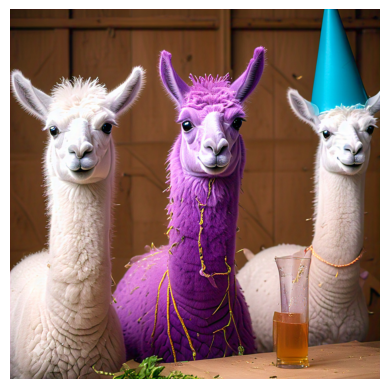

In [34]:
url = "https://raw.githubusercontent.com/meta-llama/llama-models/refs/heads/main/Llama_Repo.jpeg"

import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def display_image(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

display_image(url)

In [35]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Describe the image below.",
            },
            {"type": "image", "url": url},
        ],
    },
]

In [36]:
inputs = processor_llama4.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
)

In [37]:
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])

In [38]:
inputs.pixel_values.size()

torch.Size([10, 3, 336, 336])

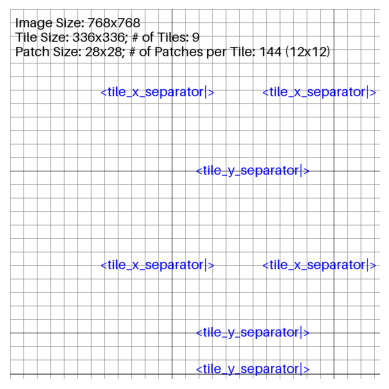

In [39]:
from utils import plot_tiled_image
plot_tiled_image(width=768, height=768, tile_size=336, patch_size=28)

In [40]:
raw_prompt = processor_llama4.tokenizer.batch_decode(inputs["input_ids"])
raw_prompt[0].replace("<|patch|>"*144, "<|patch|>...<|patch|>")

'<|begin_of_text|><|header_start|>user<|header_end|>\n\nDescribe the image below.<|image_start|><|patch|>...<|patch|><|tile_x_separator|><|patch|>...<|patch|><|tile_x_separator|><|patch|>...<|patch|><|tile_y_separator|><|patch|>...<|patch|><|tile_x_separator|><|patch|>...<|patch|><|tile_x_separator|><|patch|>...<|patch|><|tile_y_separator|><|patch|>...<|patch|><|tile_x_separator|><|patch|>...<|patch|><|tile_x_separator|><|patch|>...<|patch|><|tile_y_separator|><|image|><|patch|>...<|patch|><|image_end|><|eot|><|header_start|>assistant<|header_end|>\n\n'